**The Association Between Heart Disease and Age, Maximum Heart Rate, and Resting Blood Pressure**

**Introduction**

Everyone in today's hectic society faces pressure from a variety of sources, such as employment, education, housing, health, and so forth. Individuals in this continuously stressful setting experience a wide range of health issues. According to medical professionals, heart disease, also known as cardiovascular disease, is the main cause of mortality. Heart-related diseases account for almost 31% of deaths globally, according to data released by the World Health Organization (WHO).

The heart, one of the most vital organs in the human body, continuously and regularly pumps blood to the rest of the body to maintain normal physiological activity. Its functions include carrying oxygen, nutrients, and certain metabolites. The topic of how to track cardiac health and estimate the chance of illness has attracted a lot of attention. In order to determine the likelihood of heart disease, this article focuses on the potential predictive value of age, maximum heart rate, and resting blood pressure at admission.

In the Heart Disease dataset donated to the University of California, Irvine, a group of researchers used 14 variables to determine whether or not a patient would be diagnosed with heart disease. Using the combined data from scientists in Cleveland, Hungary, Long Island, and Switzerland as a training set for our K-nearest prediction, the given dataset will be narrowed down to answer the project-specific question. The variables included in the dataset are:
- Age
- Sex
- `cp`
- Resting Blood Pressure (on admission to the hospital): `tretbps`
- Serum Cholestoral: `chol`
- Fasting Blood Sugar > 120 mg/dl: `fbs`
- `restecg`
- Maximum Heart Rate Achieved: `thalach`
- Exercise Induced Angina: `exang`
- ST Depression Induced by Exercise Relative to Rest: `oldpeak`
- Slope
- Number of Major Vessels (0-3) Colored by Flourosopy: `ca`
- `thal`
- Diagnosis of Heart Disease: `num`

**Preliminary Exploratory Data Analysis**

In [1]:
#Packages
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(gridExtra)
options(repr.matrix.max.rows = 10)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# Variables (Column names according to the dataset specification)
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "is_disease_present")

#Datasets of Heart Disease from each country
cleveland <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.cleveland.data", 
                                    col_names = column_names) 
hungarian <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.hungarian.data", 
                                    col_names = column_names)
switzerland <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.switzerland.data",
                                    col_names = column_names)
va <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.va.data", 
                                    col_names = column_names)

#Dataset of Heart Disease (Combines the datasets from each country into one dataset)
heart_disease_all <- rbind(cleveland, hungarian) |>
    rbind(switzerland) |>
    rbind(va)

#Removing the NA variable & setting the 'is_disease_present' as the factor variable
heart_disease_all[heart_disease_all == "?"] <- NA


# Wrangling data & selecting variables used for the prediction model
heart_disease_all_final <- heart_disease_all |>
    select(age, thalach, is_disease_present) |>
    na.omit(heart_disease_all) |>
    mutate(is_disease_present = as.character(is_disease_present)) |>
    mutate(is_disease_present = as_factor(is_disease_present)) |>
    mutate(is_disease_present = fct_recode(is_disease_present, "No" = "0", "Yes" = "1", "Yes" = "2", "Yes" = "3", "Yes" = "4"))

# Converting data into numerical values
heart_disease_converted <- type.convert(heart_disease_all_final, na.strings = "NA", as.is = FALSE, dec = ".", 
            numerals = c("allow.loss")) 

# Wrangling data with all variables (used for summary statistics, not for knn-model)
heart_disease_all_int <- heart_disease_all |>
    type.convert(heart_disease_all_final, na.strings = "NA", as.is = FALSE, dec = ".", 
            numerals = c("allow.loss")) |>
    mutate(is_disease_present = as.character(is_disease_present)) |>
    mutate(is_disease_present = as_factor(is_disease_present)) |>
    mutate(is_disease_present = fct_recode(is_disease_present, "No" = "0", "Yes" = "1", "Yes" = "2", "Yes" = "3", "Yes" = "4"))

heart_disease_all_int
heart_disease_converted

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, is_disease_present

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, is_disease_p

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1   63  1   1  145      233  1   2       150     0     2.3     3     0  6   
2   67  1   4  160      286  0   2       108     1     1.5     2     3  3   
3   67  1   4  120      229  0   2       129     1     2.6     2     2  7   
4   37  1   3  130      250  0   0       187     0     3.5     3     0  3   
5   41  0   2  130      204  0   2       172     0     1.4     1     0  3   
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮  ⋮   
916 54  0   4  127      333  1   1       154      0     0      NA    NA NA  
917 62  1   1   NA      139  0   1        NA     NA    NA      NA    NA NA  
918 55  1   4  122      223  1   1       100      0     0      NA    NA  6  
919 58  1   4   NA      385  1   2        NA     NA    NA      NA    NA NA  
920 62  1   2  120      254  0   2        93      1     0      NA    NA NA  
    is_disease_present
1   No                
2   Yes               
3   Yes               
4   No                
5   No                
⋮   ⋮                 
916 Yes               
917 No                
918 Yes               
919 No                
920 Yes

age thalach is_disease_present
1   63  150     No                
2   67  108     Yes               
3   67  129     Yes               
4   37  187     No                
5   41  172     No                
⋮   ⋮   ⋮       ⋮                 
861 62  138     Yes               
862 46  126     Yes               
863 54  154     Yes               
864 55  100     Yes               
865 62   93     Yes

In [3]:
set.seed(3) #Remember to ensure the seed is the same

heart_disease_split <- initial_split(heart_disease_converted, prop = 0.75, strata = is_disease_present)
heart_disease_training <- training(heart_disease_split)
heart_disease_training
heart_disease_testing <- testing(heart_disease_split) 

age thalach is_disease_present
1   63  150     No                
2   37  187     No                
3   41  172     No                
4   56  178     No                
5   57  163     No                
⋮   ⋮   ⋮       ⋮                 
644 74  112     Yes               
645 53  128     Yes               
646 46  126     Yes               
647 54  154     Yes               
648 62   93     Yes

**Summary Statistics (Exploratory Analysis)**

The two summary table below is used to show the number of observations from the training data of the two classes (with heart disease vs. without heart disease) and presents the summarized data in the form of a tibble. Summary statistics are vital in the analysis of data because they show the generalized distribution of the data with respect to the variables we are using as predictors. For example, the `thalach` column provides the average of all the maximum achieved blood pressures for people with and without heart disease. From these statistics, we observe that people with heart disease generally have a lower maximum heart rate achieved, which suggests that it is a good predictor for heart disease. 

In [4]:
#(Exploratory Analysis - Summary Statistics)

#Shows the number of observations from the two classes
summarized_count_classes <- heart_disease_training |>
    summarize(count_disease_present = sum(is_disease_present == "Yes", na.rm = TRUE),
              count_disease_not_present = sum(is_disease_present == "No", na.rm = TRUE))

colnames(summarized_count_classes) <- c("# Observations with heart disease", "# Observations without heart disease")
summarized_count_classes

#Shows the mean/average of each variable we have chosen to use as a predictor
summarized_vars <- heart_disease_converted |> 
    group_by(is_disease_present) |>
    summarize(avg_age = mean(age, na.rm = TRUE),
             avg_maximum_heart_rate_achieved = mean(thalach, na.rm = TRUE))

colnames(summarized_vars) <- c("Heart disease present?", "Avg age", "Avg max heart rate achieved")
summarized_vars

# Observations with heart disease # Observations without heart disease
1 355                               293

Heart disease present? Avg age  Avg max heart rate achieved
1 No                     50.20205 148.8005                   
2 Yes                    55.55485 128.2616

**Data Visualization (Exploratory Analysis)**

The histograms presented below illustrate the distribution of individuals with and without heart disease across all quantifiable(Integer) variables in the dataset. The difference in the distribution between the two classes helped us decide which variables would be optimal for our predicting model (further elaborated in the next section).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 55 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 59 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 30 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 62 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 611 rows containing non-finite outside the scale range (`stat_bin()`).”


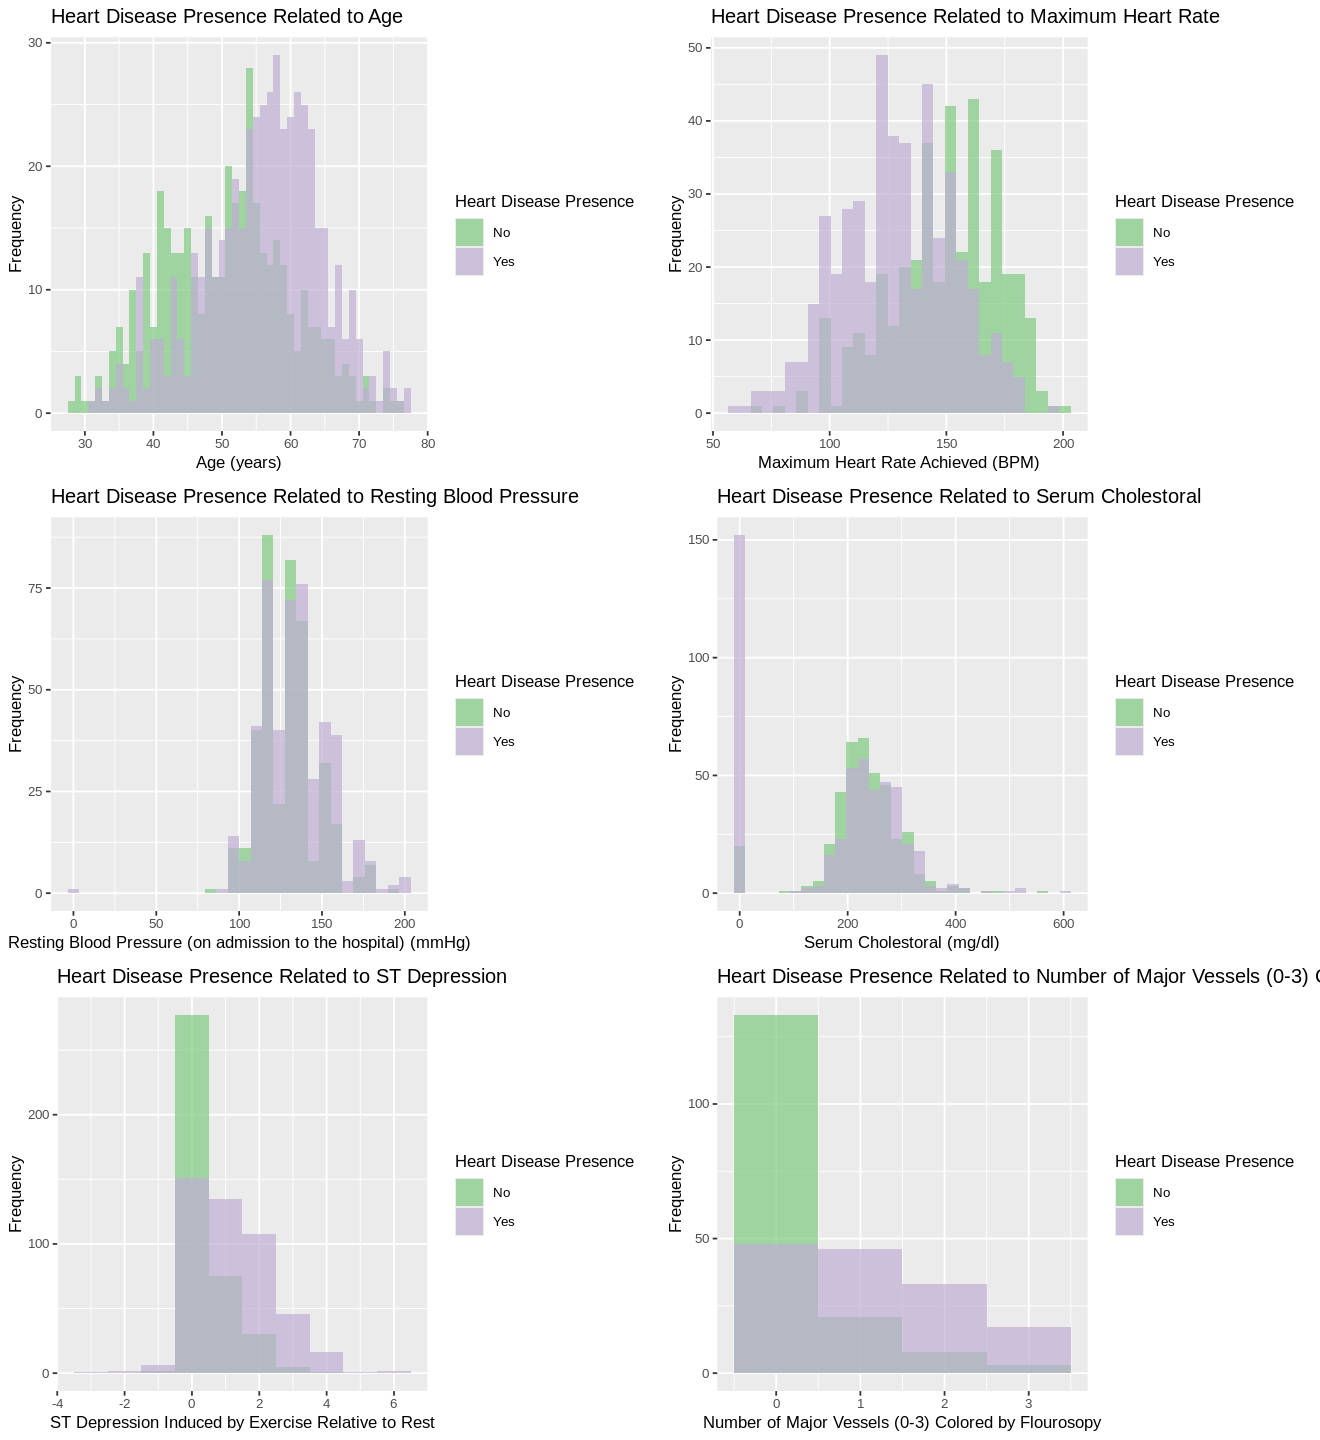

In [5]:
#Data Visualization (Exploratory Analysis)

#Quantitative Variables Used (age, trestbps, thalach)
options(repr.plot.width = 11, repr.plot.height = 12)

#Distribution of Age related to Heart Disease
age_histogram <- heart_disease_all_int |>
  ggplot(aes(x = age, fill = is_disease_present)) + 
  geom_histogram(alpha = 0.7,               
                 position = "identity",
                 binwidth = 1) +  
  labs(x = "Age (years)",
       y = "Frequency",
       title = "Heart Disease Presence Related to Age",
       fill = "Heart Disease Presence") +
  scale_fill_brewer(palette = 'Accent') +
  theme(text = element_text(size = 10))

#Distribution of Maximum Heart Rate Achieved (thalach) related to Heart Disease
thalach_histogram <- heart_disease_all_int |>
  ggplot(aes(x = thalach, fill = is_disease_present)) +  
  geom_histogram(alpha = 0.7,               
                 position = "identity") +  
  labs(x = "Maximum Heart Rate Achieved (BPM)",
       y = "Frequency",
       title = "Heart Disease Presence Related to Maximum Heart Rate",
       fill = "Heart Disease Presence") +
  scale_fill_brewer(palette = 'Accent') +
  theme(text = element_text(size = 10))

# Distribution of Resting Blood Pressure (trestbps) related to Heart Disease
ca_histogram <- heart_disease_all_int |>
 ggplot(aes(x = ca, fill = is_disease_present)) + 
 geom_histogram(alpha = 0.7,               
                position = "identity") +  
 labs(x = "Number of Major vessels (0-3) Colored by Flourosopy",
      y = "Frequency",
      title = "Heart Disease Presence Related to Number of Major vessels (0-3) Colored by Flourosopy",
      fill = "Heart Disease Presence") +
 scale_fill_brewer(palette = 'Accent') +
 theme(text = element_text(size = 10))

# Distribution of Resting Blood Pressure (trestbps) related to Heart Disease
trestbps_histogram <- heart_disease_all_int |>
 ggplot(aes(x = trestbps, fill = is_disease_present)) + 
 geom_histogram(alpha = 0.7,               
                position = "identity") +  
 labs(x = "Resting Blood Pressure (on admission to the hospital) (mmHg)",
      y = "Frequency",
      title = "Heart Disease Presence Related to Resting Blood Pressure",
      fill = "Heart Disease Presence") +
 scale_fill_brewer(palette = 'Accent') +
 theme(text = element_text(size = 10))

# Distribution of Serum Cholestoral (chol) related to Heart Disease
chol_histogram <- heart_disease_all_int |>
 ggplot(aes(x = chol, fill = is_disease_present)) + 
 geom_histogram(alpha = 0.7,               
                position = "identity") +  
 labs(x = "Serum Cholestoral (mg/dl)",
      y = "Frequency",
      title = "Heart Disease Presence Related to Serum Cholestoral",
      fill = "Heart Disease Presence") +
 scale_fill_brewer(palette = 'Accent') +
 theme(text = element_text(size = 10))

# Distribution of ST Depression Induced by Exercise Relative to Rest(oldpeak) related to Heart Disease
oldpeak_histogram <- heart_disease_all_int |>
 ggplot(aes(x = oldpeak, fill = is_disease_present)) + 
 geom_histogram(alpha = 0.7,               
                position = "identity",
                binwidth = 1) +  
 labs(x = "ST Depression Induced by Exercise Relative to Rest",
      y = "Frequency",
      title = "Heart Disease Presence Related to ST Depression",
      fill = "Heart Disease Presence") +
 scale_fill_brewer(palette = 'Accent') +
 theme(text = element_text(size = 10))

# Distribution of Number of Major Vessels (0-3) Colored by Flourosopy
ca_histogram <- heart_disease_all_int |>
 ggplot(aes(x = ca, fill = is_disease_present)) + 
 geom_histogram(alpha = 0.7,               
                position = "identity",
                binwidth = 1) +  
 labs(x = "Number of Major Vessels (0-3) Colored by Flourosopy",
      y = "Frequency",
      title = "Heart Disease Presence Related to Number of Major Vessels (0-3) Colored by Flourosopy",
      fill = "Heart Disease Presence") +
 scale_fill_brewer(palette = 'Accent') +
 theme(text = element_text(size = 10))

grid.arrange(
    age_histogram, thalach_histogram, trestbps_histogram, chol_histogram,
    oldpeak_histogram, ca_histogram,  ncol = 2
  )

**Explanation of Variables Picked**

Out of the 14 variables, 7 were qualitative(Categorical) variables. Because the KNN algorithm works best with quantitative variables (e.g. calculating Euclidean distance), thus we were left with 6 quantitave(Integer) variables to look into. Out of the 6 variables, we selected only two: "Age" and "Maximum Heart Rate (labelled as thalac in dataset)". 

For instance, looking at "Heart Disease Presense related to Resting Blood Pressure" histogram, the distribution of those with heart disease and those without heart disease is very similar. To elaborate for this histogram, both distributions look symmetrical with roughly the same center. Furthemore, there seems to be no clusters among the distribution. Using thought of logic, we determined that  "ST Depression", "Resting Blood Pressure", "Serum Cholestoral" are not optimal in using as a variable for our knn algorithm because the distribution among these variables are very similar.

Now, for the "average resting heart rate", the distribution of people with and without heart disease are different from one another. Both distribution are symmetrical and have no seperate clusters, but the centers are clearly different from one another. The  same can be said about the distribution with relation to "age". Thus, when we plotted all five of the variables as histograms, it became evident that "age" and "maximum heart rate" were the most effective variables for predicting the presence or absence of heart disease because the distribution in the presense of heart disease was visually different. 


**Methods**

We will conduct our data analysis using two variables from the Heart Disease dataset to predict whether or not an unknown patient has heart disease. As predictors, we are using age & maximum heart rate achieved. The given data is a training set for our K-nearest neighbor prediction and the responding variable, whether or not a patient has heart disease, will be predicted. 

To visualize the results, a combination of tables and scatterplots will be used. The table will contain summaries of the data and are an easy way to visualize the results of the prediction. The scatterplots will visualize the results and predictions made by the K-nearest neighbor for unknown patients. 

**KNN Specification**

In crafting our KNN algorithm, guided by insights gleaned from our preceding analysis, we tailored our approach to focus on the "age" and "thalach" variables. Leveraging the `tune` function within the KNN specification, we implemented a 5-fold cross-validation strategy to ascertain the most effective number of neighbors for our classification model.

Initially, we explored a broad range of neighbor values, spanning from 1 to 550, with increments of 50. Plotting the relationship between the number of neighbors and model accuracy revealed a peak within the 0 to 100 neighbor range. Seeking greater precision in determining the optimal number of neighbors, we refined our workflow to explore a narrower scope, ranging from 1 to 100, with increments of 5. Upon revisiting our analysis, we identified 51 as the optimal number of neighbors for our KNN algorithm.

[1] 51

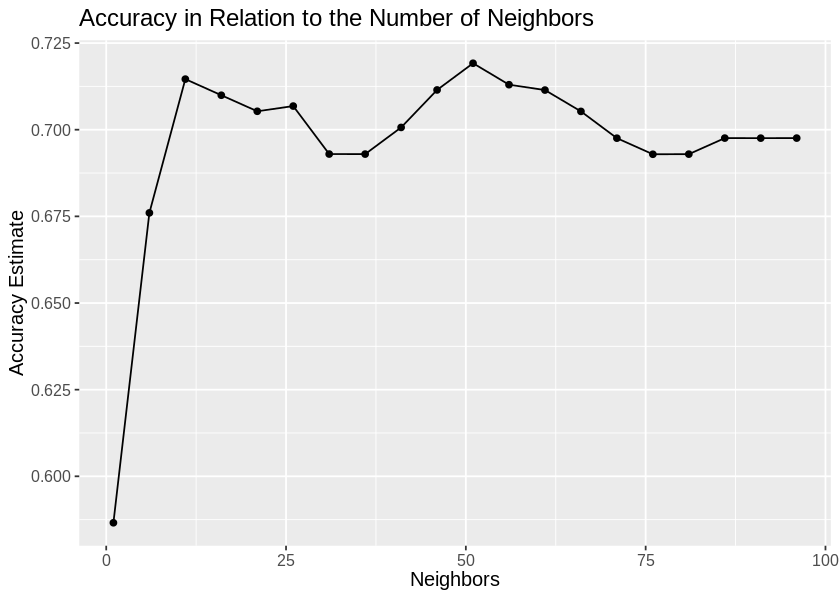

In [9]:
set.seed(3) #Remember to ensure the seed is the same
options(repr.plot.width = 7, repr.plot.height = 5)

#Recipe
heart_disease_recipe <- recipe(is_disease_present ~ thalach + age, data = heart_disease_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#KNN Spec
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

#5 Cross-Validation
heart_disease_vfold <- vfold_cv(heart_disease_training, v = 5, strata = is_disease_present)

#Neighbors tested with increment of 50
# k_vals <- tibble(neighbors = seq(from = 1, to = 550, by = 50))

#Neighbors tested with increment of 10
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Workflow
knn_results <- workflow() |>
    add_recipe(heart_disease_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_disease_vfold, grid = k_vals) |>
    collect_metrics()


accuracies <- knn_results |>
     filter(.metric == "accuracy")

#Line Plot that measures the relation between #neighbors and accuracy of the predictor model
accuracy_vs_k_lots <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy in Relation to the Number of Neighbors") +
  theme(text = element_text(size = 12))

accuracy_vs_k_lots

#Returns the most optimal number for the neighbor
optimal_neighbor_number <- accuracies |>
    group_by(neighbors) |>
    arrange(by = desc(mean)) |>
    head(1) |>
    pull(neighbors)

optimal_neighbor_number

**Testing trained KNN Algorithm on the Testing Data**

Once we've identified our optimal number of neighbors, we're ready to deploy our workflow on the testing dataset. Utilizing the `metrics` function, we assess the performance of our predictive model, which demonstrates a 66.82% accuracy in distinguishing individuals with heart disease from those without. While this accuracy may seem modest, it aligns with our expectations, given that we've only leveraged two variables out of the original four available to us.

Reflecting on the histogram analysis, had we incorporated the three additional variables initially excluded, and if these variables exhibited distinct distributions among individuals with and without heart disease, we could anticipate a higher accuracy rate.

In [7]:
#Applying our best optimized predicting model onto our heart disease testing data
optimal_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = optimal_neighbor_number) |>
  set_engine("kknn") |>
  set_mode("classification")

optimal_knn_fit <- workflow() |>
  add_recipe(heart_disease_recipe) |>
  add_model(optimal_knn_spec) |>
  fit(data = heart_disease_training)

heart_disease_test_predictions <- predict(optimal_knn_fit, heart_disease_testing) |>
  bind_cols(heart_disease_testing)

heart_disease_test_predictions |>
  metrics(truth = is_disease_present, estimate = .pred_class) |>
  filter(.metric == "accuracy")

heart_disease_test_predictions

.metric  .estimator .estimate
1 accuracy binary     0.6682028

.pred_class age thalach is_disease_present
1   No          53  155     Yes               
2   No          48  168     Yes               
3   No          54  160     No                
4   Yes         58  160     Yes               
5   No          58  172     No                
⋮   ⋮           ⋮   ⋮       ⋮                 
213 Yes         57  119     Yes               
214 Yes         57  100     Yes               
215 Yes         62  108     Yes               
216 Yes         62  138     Yes               
217 Yes         55  100     Yes

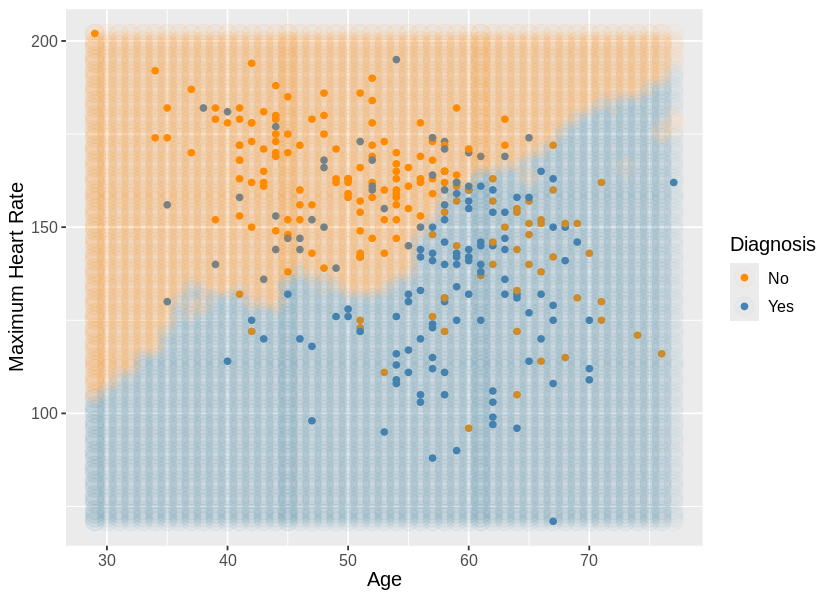

In [8]:
options(repr.plot.width = 7, repr.plot.height = 5)

heart_disease_all_int <- heart_disease_all_int |>
    mutate(age = as.integer(age)) |>
    mutate(thalach = as.integer(thalach)) |>
    na.omit(heart_disease_all)

#Create the grid of thalach/trestbps/age vals, and arrange in a data frame
tha_grid <- seq(min(heart_disease_all_int$thalach),
               max(heart_disease_all_int$thalach),
               length.out = 100) |>
               as.integer()

age_grid <- seq(min(heart_disease_all_int$age),
               max(heart_disease_all_int$age),
               length.out = 100) |>
               as.integer()

asgrid <- as_tibble(expand.grid(thalach = tha_grid,
                               age = age_grid))

#Predictions at the grid points
knnpredgrid <- predict(optimal_knn_fit, asgrid)

#Bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnpredgrid, asgrid) |>
                    rename(class = .pred_class)

# wkflw_plot:
# 1. the colored scatter of the original data
# 2. the faded colored scatter for the grid points
wkflw_plot <-
  ggplot() +
  geom_point(data = heart_disease_all_int,
             mapping = aes(x = age,
                           y = thalach,
                           color = is_disease_present),
             alpha = 1.00) +
  geom_point(data = prediction_table,
             mapping = aes(x = age,
                           y = thalach,
                           color = class),
             alpha = 0.03, size = 5) +
  labs(color = "Diagnosis",
       x = "Age",
       y = "Maximum Heart Rate",
       title = "Heart Disease Classi ") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))

wkflw_plot

**Visualization of the Effectiveness of our KNN Algorithm**

The scatter plot juxtaposes age against maximum heart rate, with the background color denoting the classifier's decision. It reveals that maximum heart rate tends to be a more reliable predictor of heart disease presence than age. This is evidenced by fewer predictions of heart disease as maximum heart rate increases. Nonetheless, the plot illustrates that predictions of heart disease persist across all age ranges, underscoring the complexity of the relationship between age and heart disease prediction.

In addition, the scatter plot is mainly smooth without underfitting and overfitting, which explains that our model is influenced by the training data at a right amount.

**Expected Outcomes and Significance**

**Expected Findings**:
With the increasing age and maximum heart rate, the likelihood of having heart disease is going to increase too. A strong positive relarionship is expected to be observed in the scatter plot juxtaposes age against maximum heart rate. 

**Conclusion**:
A 66.82% accuracy is being observed which is slightly lower than expected but is still good enough to illustrate the relationship between the age, maximum heart rate and likelihood of having heart disease. A strong positive relationship showed by the scatter plot juxtaposes age against maximum heart rate gives us the evidence that with increasing age and maximum heart rate, the risk of heart disease has also increased. This provide the evidence for our hypothesis. But since there is scope for improving accuracy, whether or not the disease is present may be affected by other factors as well.

**The Impact of our Findings**:
Directions on how to estimate the risk of acquiring heart disease are provided by this project. A key foundation for evaluating that risk in medicine is the patient's age and maximum heart rate. In order to help those who are at a high risk of contracting the disease receive treatment as soon as possible, predictive features can be incorporated to the healthcare system to notify them to take urgent action.
**A Future Question**: We only examined the relationship between heart disease between 2 variables, but there are a total of 14 variables in the original dataset. Earlier we determined that most of the quantitative variables in the dataset were not useful in predicting heart disease, thus are there any different variables not mentioned in the dataset that could be studied to determine the presence of heart disease?

In the article "The Relationship Among Fasting Blood Glucose, Lipid Panel, and Global Scoring of Myocardial Perfusion Imaging", the correlation between fasting blood glucose and heart disease is studied. The conclusion suggested fasting blood glucose is a beneficial tool for predicting the MPS global scores and perfusion defect rates. (MPS global scores and perfusion defect rates are for detecting heart diseases.) This suggests that we could test the correlations between fasting blood sugar and heart disease. While the dataset includes a fasting blood sugar variable labeled "fbs," it's worth noting that it's categorical, with two distinct values: 1 and 0. (Here, 1 indicates fasting blood sugar levels above 120 mg/dl, while 0 represents levels at or below 120 mg/dl.) Having fbs into a quantitative variable, rather than a qualitative one, could enhance our ability to assess the likelihood of heart disease presence.

Moreover, the article "Heart Disease and Stroke Statistics—2021 Update : A Report From the American Heart Association" illustrates more potential variables besides the dataset, such as tobacco use, diet, nutrition, and physical activity. This inspires people to collect data on more predictive variables, and use them to test correlations with heart disease in the future.

**Reference**

- Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

- Virani, S. S., Alonso, A., Aparicio, H. J., Benjamin, E. J., Bittencourt, M. S., Callaway, C. W., Carson, A. P., Chamberlain, A. M., Cheng, S., Delling, F. N., Elkind, M. S. V., Evenson, K. R., Ferguson, J. F., Gupta, D. K., Khan, S. S., Kissela, B. M., Knutson, K. L., Lee, C. D., Lewis, T. T., … Tsao, C. W. (2021). Heart disease and stroke statistics—2021 update. Circulation, 143(8). https://doi.org/10.1161/cir.0000000000000950 

- V. Ramalingam, V., Dandapath, A., & Karthik Raja, M. (2018). Heart disease prediction using Machine Learning Techniques : A survey. *International Journal of Engineering & Technology*, 7(2.8), 684. https://doi.org/10.14419/ijet.v7i2.8.10557 